<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd #Импорт нужных библотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
hh_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
display(hh_df.shape)

# Здесь и далее используется база резюме
# ресурса HeadHunter, доступный по ссылке:
# http://tiny.cc/10hruz (434 МБ)

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
#ваш код здесь
display(hh_df.head(5))
display(hh_df.tail(5))
display(hh_df.info())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
display(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
col_null = (hh_df.isnull().mean()*100).sort_values(ascending=False)
display(col_null)

Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
Пол, возраст                       0.000000
ЗП                                 0.000000
Ищет работу на должность:          0.000000
Город, переезд, командировки       0.000000
Занятость                          0.000000
График                             0.000000
Образование и ВУЗ                  0.000000
Обновление резюме                  0.000000
Авто                               0.000000
dtype: float64

5. Выведите основную статистическую информацию о столбцах.


In [6]:
display(hh_df.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
def edu_cutter(description):
    description = description.split(' ')
    if description[0] == 'Высшее':
        output = description[0]
    if description[0] == 'Неоконченное':
        output = (description[0]+' '+description[1])
    if description[0] == 'Среднее':
        # Здесь мы разделяем Среднее и Среднее специальное,
        # т.к. они единственные начинаются с одного слова.
        if description[1] == 'специальное':
            output = description[0]+' '+description[1]
        else:
            output = description[0]
    return output.lower()
    
hh_df['Образование'] = \
    pd.Categorical(hh_df['Образование и ВУЗ'].apply(edu_cutter))
hh_df.drop('Образование и ВУЗ', axis=1)
    # Создаём новый столбец, "Образование", через edu_cutter
    # и убираем старый столбец.


display(hh_df['Образование'].value_counts())



высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
def sex_age_cutter(description):
    # Сперва разделим строки по разным
    # комбинациям пробелов и запятой,
    # сначала вычленив пол, потом возраст
    description = description.split(' ,  ')
    sex = description.pop(0)
    description = description[0].split(' , ')
    age = description.pop(0)
    age = int(age[:2])
    return pd.Series({"Пол": sex, "Возраст": age})
    # Возвращаем сразу два значения
    # для двух столбцов.
    
hh_df[['Пол','Возраст']] = \
    hh_df['Пол, возраст'].apply(sex_age_cutter)    
hh_df['Пол'] = pd.Categorical(hh_df['Пол'])
hh_df.drop('Пол, возраст', axis=1,inplace=True)
    # Получаем пол и возраст из столбца,
    # Сразу делаем пол категорией
    # Убираем старый столбец

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:
def get_experience(arg):

    month_key_words = ['месяца', 'месяцев', 'месяц']
    year_key_words = ['год', 'года', 'лет']
    month = 0
    year = 0
    if pd.isna(arg):
        return(np.nan)
    # Отсуствующие ячейки заполняем NAN
    
    args_splitted = re.sub(r'[^\w\s]', '', arg)
    args_splitted = str(args_splitted).split(' ')
    del args_splitted[:2], args_splitted[4:]
    # Представляя конструкцию предложения,
    # вырезаем только нужный фрагмент вида
    # NN лет NN месяцев

    # Два цикла последовательно отбирают
    # сначала число года, потом месяца,
    # если они содержатся в строке.
    for i in range(len(args_splitted)):
        if args_splitted[i] in year_key_words:
            year = args_splitted[i-1]
            break
    for i in range(len(args_splitted)):
        if args_splitted[i] in month_key_words:
            month = args_splitted[i-1]
            break

    return int(year)*12+int(month)
    # Возращаем количество месяцев

hh_df['Опыт работы (месяц)'] = \
    hh_df['Опыт работы'].apply(get_experience)

display(hh_df['Опыт работы (месяц)'].describe())
    # Получаем сводку по месяцам работы у всех соискателей.

count    44576.000000
mean       114.413810
std         79.049803
min          0.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [10]:
def get_location(arg):
    million_cities = ['Москва', 'Санкт', 'Новосибирск',
                      'Екатеринбург','Нижний','Казань',
                  'Челябинск','Омск', 'Самара', 'Ростов', 'Уфа',
                  'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    # Список городов-миллионников, все иные будут Other.
    # Для простоты они сокращены до первого слова
    city = ''
    reloc = True
    trips = True
    
    if pd.isna(arg):
        return(np.nan)
    args = str(arg).split(',')
    args = re.sub(r'[^\w\s]', ' ', arg)
    args = str(args).split(' ')
    # Делим строки
    
    if args[0] in million_cities: # Здесь мы определяем город
        city = args[0]
        if city == 'Санкт': city = 'Санкт-Петербург'
        if city == 'Нижний': city = 'Нижний Новгород'
        if city == 'Ростов': city = 'Ростов-на-Дону'
        # Возвращаем многословные города
    else:
        city = 'Другие'
        # Бросаем города поменьше под один лэйбл
        
    args = str(arg).split(',')
    if 'м.' in args[1]:
        args.pop(1)
        # Избавляемся от станций метро
        
    if ' не ' in args[1]:
        reloc = False
        # Узнаём про релокацию по частице "не"
    
    if ' не ' in args[2]:
        trips = False
        # Узнаём про командировки по частице "не"

    return pd.Series({'Город': city, 'Готовность к переезду': \
        reloc, 'Готовность к командировкам' : trips})
        # Возвращаем все три значения


hh_df[['Город','Готовность к переезду','Готовность к командировкам']]\
    = hh_df['Город, переезд, командировки'].apply(get_location)
    # Создаём три столбца

display(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ЗП                               44744 non-null  object  
 1   Ищет работу на должность:        44744 non-null  object  
 2   Город, переезд, командировки     44744 non-null  object  
 3   Занятость                        44744 non-null  object  
 4   График                           44744 non-null  object  
 5   Опыт работы                      44576 non-null  object  
 6   Последнее/нынешнее место работы  44743 non-null  object  
 7   Последняя/нынешняя должность     44742 non-null  object  
 8   Образование и ВУЗ                44744 non-null  object  
 9   Обновление резюме                44744 non-null  object  
 10  Авто                             44744 non-null  object  
 11  Образование                      44744 non-null  category
 12  Пол 

None

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [11]:
# Так как процесс полностью аналогичен,
# этот код из двух блоков вынесен в другой файл
from shrt import get_occupation
from shrt import get_occupation_prefs

hh_df[['Полная занятость','Частичная занятость',
       'Проектная работа','Стажировка','Волонтёрство'
       ]] = hh_df['Занятость'].apply(get_occupation)

hh_df[['Полный день','Гибкий график','Сменный график',
       'Вахтовый метод','Удалённая работа'
       ]] = hh_df['График'].apply(get_occupation_prefs)

hh_df.drop(['Полная занятость','Частичная занятость',
            'Проектная работа','Стажировка','Волонтёрство',
            'Полный день','Гибкий график','Сменный график',
            'Вахтовый метод','Удалённая работа'], axis=1,inplace=True)
       # Избавляемся от только что созданных столбцов
       
display(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ЗП                               44744 non-null  object  
 1   Ищет работу на должность:        44744 non-null  object  
 2   Город, переезд, командировки     44744 non-null  object  
 3   Занятость                        44744 non-null  object  
 4   График                           44744 non-null  object  
 5   Опыт работы                      44576 non-null  object  
 6   Последнее/нынешнее место работы  44743 non-null  object  
 7   Последняя/нынешняя должность     44742 non-null  object  
 8   Образование и ВУЗ                44744 non-null  object  
 9   Обновление резюме                44744 non-null  object  
 10  Авто                             44744 non-null  object  
 11  Образование                      44744 non-null  category
 12  Пол 

None

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [12]:
e_r = pd.read_csv('data/ExchangeRates.csv', sep=',')
e_r['date'] = pd.to_datetime(e_r['date'])
hh_df['Обновление резюме'] = \
    pd.to_datetime(hh_df['Обновление резюме'])
hh_df['Обновление резюме'] = \
    hh_df['Обновление резюме'].apply(lambda x: x.date())
hh_df['Обновление резюме'] = \
    pd.to_datetime(hh_df['Обновление резюме'])
    # Привели даты таблиц обменных курсов
    # и наших вакансий к Datetime

currency_names = {
    'руб.':'RUB',
    'KZT':'KZT',
    'USD':'USD',
    'бел.руб.':'BYN',
    'EUR':'EUR',
    'грн.':'UAH',
    'сум':'UZS',
    'KGS':'KGS',
    'AZN':'AZN',
    }
    # Сделали словарь сокращений по ISO

def in_currency(wage,date):
    if pd.isna(wage):
        return(np.nan)
    wages = str(wage).split(' ')

    amount,currency_name = wages[0],wages[1]
    # Разделили строку и вытянули объём, валюту ЗП
    
    currency_name = currency_names[currency_name]
    if currency_name != 'RUB':
        # для всех случаев кроме рублей
        mask_a = e_r['currency']==currency_name
        mask_b = e_r['date']==date
        right_row = e_r[mask_a & mask_b]
        # Через маски достаём нужное значение из ДФ
        amount = int(amount)*float(right_row['close'])\
            /float(right_row['proportion'])
            # Вычисляем, сколько соискатель хотел в рублях
    return int(amount)


hh_df['ЗП (руб)'] = hh_df[['ЗП', 'Обновление резюме']].\
    apply(lambda x : in_currency(*x), axis=1)
    # Получаем заветный столбец ЗП в рублях
    # на момент подачи резюме

print(hh_df['ЗП (руб)'].median())

59018.5


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

0    30
Name: Возраст, dtype: int64


Text(0, 0.5, 'Пол соискателя')

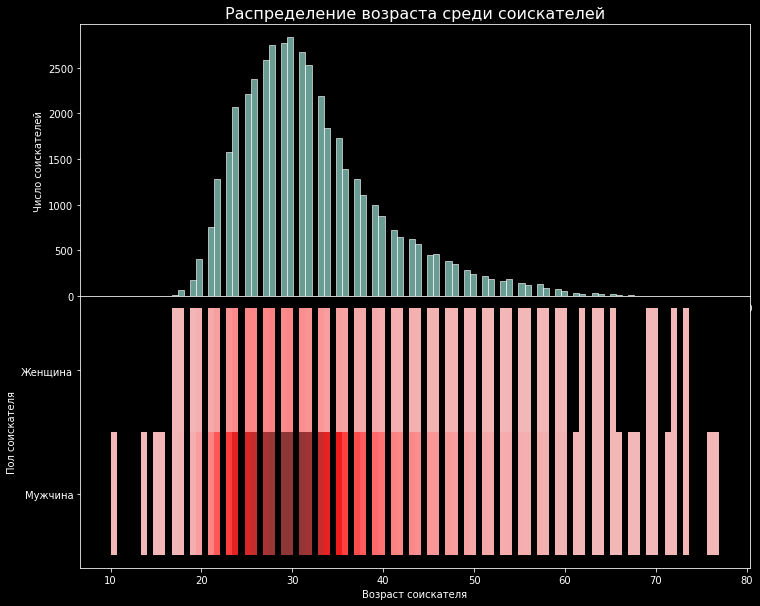

In [13]:
print(hh_df['Возраст'].mode())

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)
    # Строим таблицы распределения возраста

histplot1 = sns.histplot(
    data=hh_df, 
    x='Возраст',
    bins=100,
    ax=axes[0],
)
histplot1.set_title('Распределение возраста среди соискателей', fontsize=16)
histplot1.set_xlabel('Возраст соискателя)')
histplot1.set_ylabel('Число соискателей')

histplot2 = sns.histplot(
    data=hh_df,
    x='Возраст',
    y='Пол',
    bins=100,
    color='red',
    ax=axes[1]
)
histplot2.set_xlabel('Возраст соискателя')
histplot2.set_ylabel('Пол соискателя')

**Выводы**

Основная масса соискателей приходится на декаду 25-35 лет для обоих полов, преобладают мужчины.

Интересной аномалией является присутствие оторванных от общей массы регионов на нижнем графике: мужчин 10-12 и 75+ лет, а также женщин старше 70 лет. Эти данные кажутся несколько подозрительными и могут исказить представление о базе резюме.

ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

1188.0
114.41381012203877


Text(0.5, 0, 'Опыт работы в месяцах')

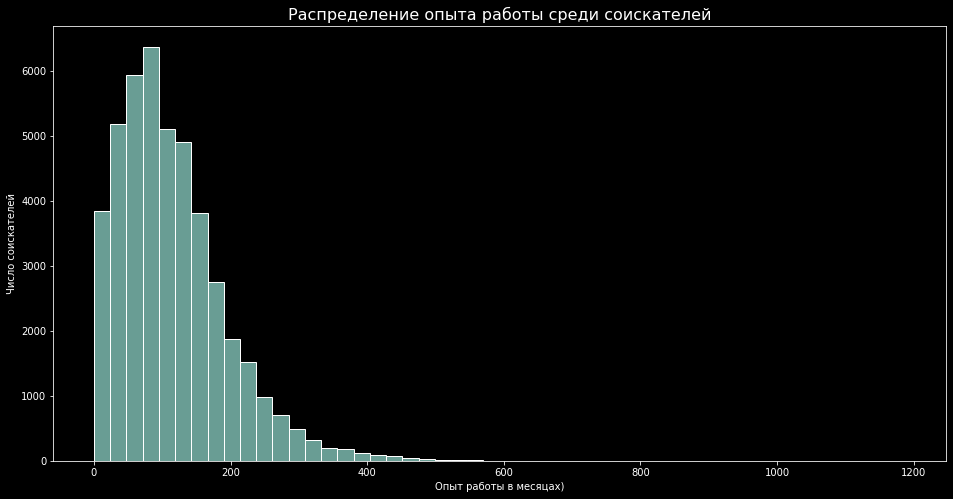

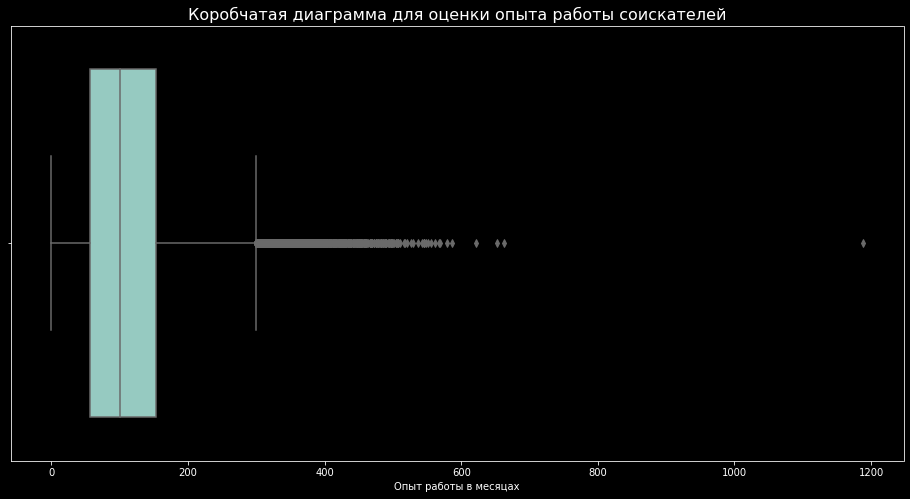

In [14]:
# ваш код здесь
print(hh_df['Опыт работы (месяц)'].max())
print(hh_df['Опыт работы (месяц)'].mean())

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=hh_df, 
    x='Опыт работы (месяц)',
    bins=50
)
histplot1.set_title('Распределение опыта работы среди соискателей', fontsize=16)
histplot1.set_xlabel('Опыт работы в месяцах)')
histplot1.set_ylabel('Число соискателей')

fig = plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(data=hh_df, x='Опыт работы (месяц)')
boxplot.set_title('Коробчатая диаграмма для оценки опыта работы соискателей', fontsize=16)
boxplot.set_xlabel('Опыт работы в месяцах')

чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?

**Выводы**

Мода о\р около 115 месяцев среди соискателей, большинство из них сосредоточено вокруг этого значения с плавным спадом вплоть до 600 месяцев (50 лет), после чего претендентов уже не наблюдается. Пределы близятся к 0 и 1188 месяцам, что можно легко посчитать мусором, особенно верхнюю границу, так как 99 лет работы при меньшем сроке жизни получить невозможно.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


50000     4064
40000     3762
30000     3264
60000     3087
70000     2388
          ... 
96103        1
280          1
999          1
64386        1
101686       1
Name: ЗП (руб), Length: 1109, dtype: int64


Text(0, 0.5, 'Количество резюме')

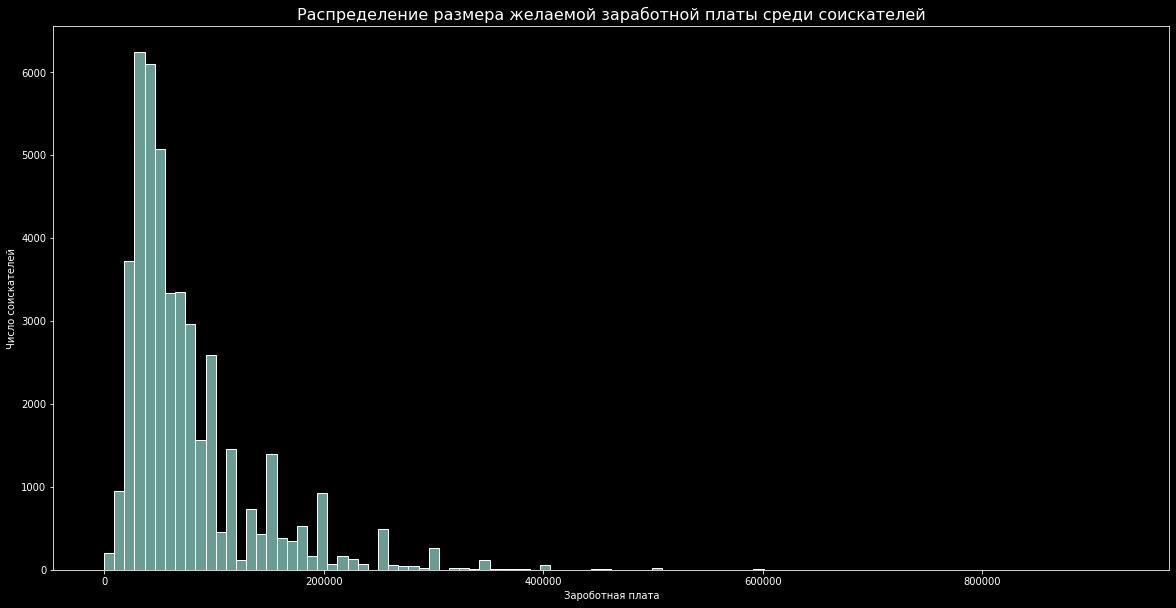

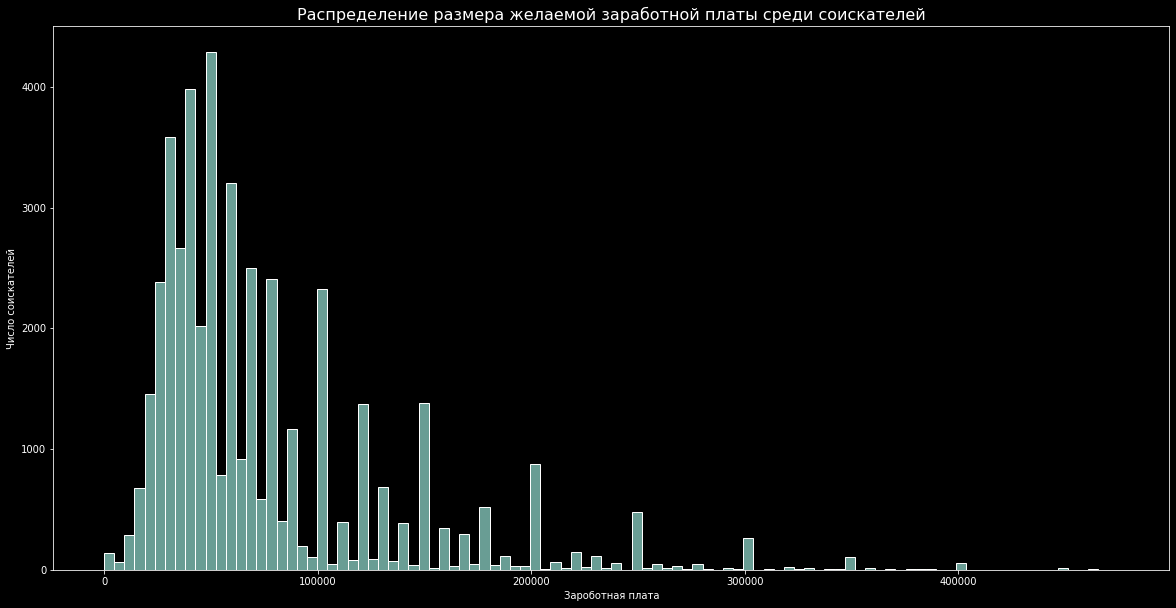

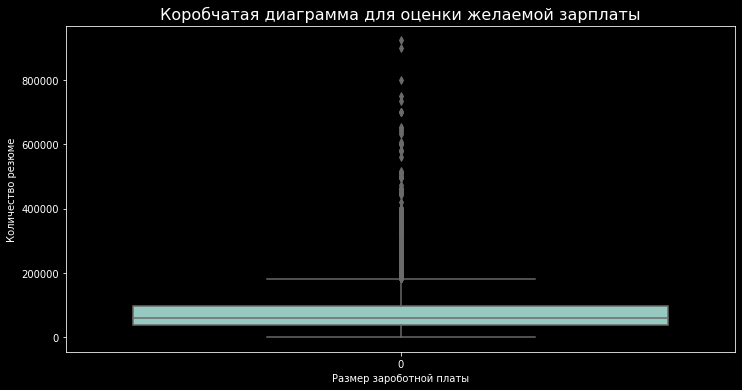

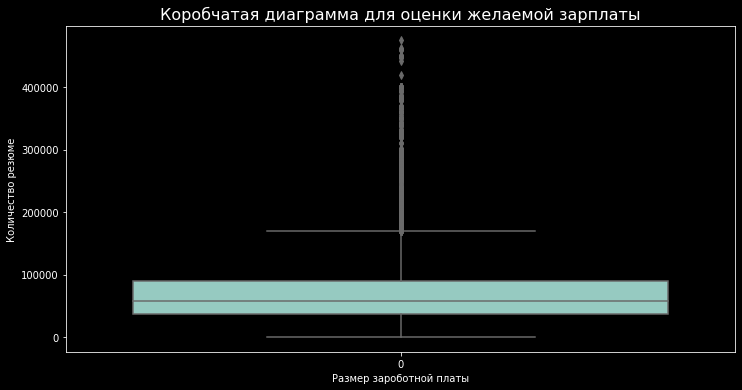

In [15]:
mask_zp_1kk = hh_df[hh_df['ЗП (руб)']<1000000]['ЗП (руб)']
mask_zp_05kk = hh_df[hh_df['ЗП (руб)']<500000]['ЗП (руб)']
# Создаём маску для выделения одного столбца
# с верхним лимитом значений в 1 млн. и 500 тысяч

print(hh_df['ЗП (руб)'].value_counts())

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=mask_zp_1kk,
    bins=100,
)
histplot1.set_title('Распределение размера желаемой заработной платы среди соискателей', fontsize=16)
histplot1.set_xlabel('Зароботная плата')
histplot1.set_ylabel('Число соискателей')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
plt.subplots_adjust(hspace=.0)
histplot2 = sns.histplot(
    data=mask_zp_05kk,
    bins=100,
)
histplot2.set_title('Распределение размера желаемой заработной платы среди соискателей', fontsize=16)
histplot2.set_xlabel('Зароботная плата')
histplot2.set_ylabel('Число соискателей')

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=mask_zp_1kk)
boxplot.set_title('Коробчатая диаграмма для оценки желаемой зарплаты', fontsize=16)
boxplot.set_xlabel('Размер зароботной платы')
boxplot.set_ylabel('Количество резюме')

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=mask_zp_05kk)
boxplot.set_title('Коробчатая диаграмма для оценки желаемой зарплаты', fontsize=16)
boxplot.set_xlabel('Размер зароботной платы')
boxplot.set_ylabel('Количество резюме')


**Выводы**

По графикам (которые я также привёл с границей в 500 тысяч рублей) можно сделать следующие заключения:

1. Запросы в резюме тяготеют к нижней границе, большинство ищущих работу видит приемлимой зарплату от 0 до 200 тысяч рублей (где находится "максимум"), а межквартильный размах так и вовсе умещается в промежутке 50-100 тысяч рублей, что подтверждается value_counts(): пять популярных значений – суммы 30-70 т.р.
2. Гистограмма, особенно приближенная, выглядит на редкость ступенчато – это говорит нам о том, что соискателям свойственно указывать "круглые" суммы, кратные десяти или пятидесяти тысячам рублей: 100, 150, 200, 250, 300, 350 и 400 тысяч. Как вехи, каждые новые 50 тысяч являются важной ступенью. Соответственно, и предложение может чаще "прилипать" к этим границам.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

                     Медиана  Минимум  Максимум
Образование                                    
высшее               60000.0        1    923983
неоконченное высшее  50000.0        1    645171
среднее              40000.0      250    300000
среднее специальное  40000.0        1    442038


<AxesSubplot:xlabel='Образование'>

array([<AxesSubplot:title={'center':'Медиана'}, xlabel='Образование'>,
       <AxesSubplot:title={'center':'Минимум'}, xlabel='Образование'>,
       <AxesSubplot:title={'center':'Максимум'}, xlabel='Образование'>],
      dtype=object)

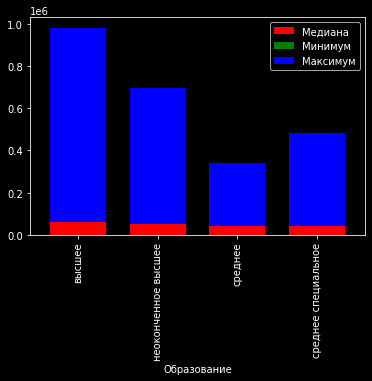

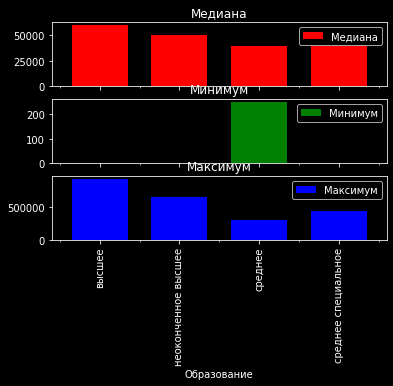

In [44]:
mask = hh_df[hh_df['ЗП (руб)']<1000000]

mask1=mask.groupby(by='Образование')['ЗП (руб)'].median()
mask2=mask.groupby(by='Образование')['ЗП (руб)'].min()
mask3=mask.groupby(by='Образование')['ЗП (руб)'].max()
mask_zp = pd.DataFrame()
mask_zp['Медиана'], mask_zp['Минимум'], mask_zp['Максимум'] = pd.Series(mask1), pd.Series(mask2), pd.Series(mask3)
print(mask_zp)
#display(mask)
display(mask_zp.plot.bar(
    width=0.7,
    color=['red','green','blue'],
    stacked=True
))

display(mask_zp.plot.bar(
    color=['red','green','blue'],
    width=0.7,
    subplots=True
))


ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

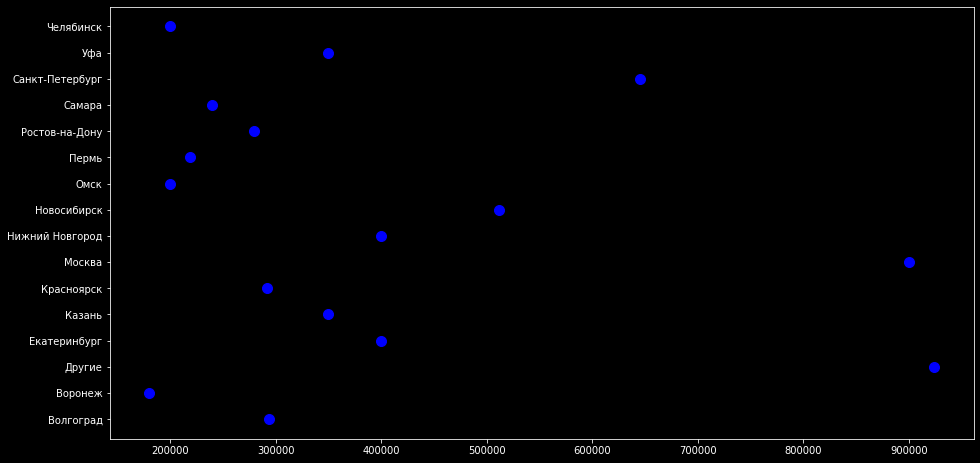

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

bar2 = hh_df[hh_df['ЗП (руб)']<1e6].groupby(by='Город', as_index=False).max()
fig = plt.figure(figsize=(12, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=bar2['ЗП (руб)'], 
    y=bar2['Город'], 
    s=100,
    marker='o',
    c = 'blue'
);


ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [18]:
#print(hh_df[hh_df['Готовность к переезду'] == True & hh_df['Готовность к командировкам'] == True]['ЗП (руб)'].median())
mask_true_1 = hh_df[hh_df['Готовность к переезду'] == True]
mask_true_2 = hh_df[hh_df['Готовность к командировкам'] == True]
mean_wage = hh_df[mask_true_1]['ЗП (руб)'].mean()

TypeError: Cannot setitem on a Categorical with a new category (False), set the categories first

In [ ]:
#ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь